# CASO PREDICCION DE INGRESOS DE AGENCIAS FINANCIERAS

In [1]:
import os
import pandas as pd

In [2]:
os.getcwd()

'E:\\Cursos\\Escuela Fullstack\\codigos'

In [3]:
os.chdir('E:\\Cursos\\Escuela Fullstack\\datasets')

In [4]:
X_sc2 = pd.read_csv('X_sc2.csv')
X_sc2.head()

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Saldo,Meses.en.Funcion,PCA1,PCA2,Clusters
0,1.446519,1.277585,1.004783,0.054485,-0.050573,-0.229777,-0.373024,-0.110845,-0.097945,-0.941816,1.354565,1.845690,2
1,2.201745,1.508466,1.786146,-0.216628,-0.275232,-0.410476,-0.728817,-0.375103,-0.264979,-0.742278,1.696640,2.876920,2
2,1.871532,1.403721,0.831406,0.153551,0.172145,-0.050200,0.411396,0.105822,0.152350,-0.619909,2.061114,1.336570,2
3,1.456239,1.101076,1.987082,1.045825,1.047966,0.386785,2.074341,0.019250,0.541517,0.270296,3.582927,-0.053769,2
4,1.395312,1.142421,1.312514,0.273508,0.221124,0.149740,0.665994,0.159600,0.146517,0.112650,2.214253,0.818686,2


In [5]:
X_sc2.describe(include='all')

,Mora.Media,CAR.Media,Cartera.Pesada.Promedio,Ingreso.Promedio,Intereses.de.Credito.Jun.17,Utilidad.Mes.M,Clientes,Desembolsos,Saldo,Meses.en.Funcion,PCA1,PCA2,Clusters
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,1.190000e+02,119.000000
mean,0.004134,0.001511,0.005245,-0.068192,-0.069024,-0.065781,-0.037987,-0.069551,-0.080804,-0.014370,7.836868e-17,-3.265362e-17,0.672269
std,1.007413,1.008302,1.006787,0.673945,0.663617,0.702343,0.917782,0.656919,0.476236,0.995971,2.011151e+00,1.226495e+00,0.737716
min,-1.347615,-1.325574,-1.577978,-1.017244,-1.131235,-1.616702,-1.503569,-1.090724,-0.825238,-1.064736,-3.582348e+00,-2.875709e+00,0.000000
25%,-0.639301,-0.633698,-0.731653,-0.661665,-0.594158,-0.475302,-0.727205,-0.583121,-0.451476,-0.762673,-1.558796e+00,-6.692672e-01,0.000000
50%,-0.145636,-0.167856,-0.101537,-0.153427,-0.132992,-0.146548,-0.189326,-0.192692,-0.138626,-0.323909,2.191259e-01,8.451879e-02,1.000000
75%,0.536719,0.449241,0.565466,0.408173,0.399976,0.310395,0.617008,0.257337,0.243775,0.430698,1.662022e+00,6.182499e-01,1.000000
max,3.582061,3.770540,3.932214,1.286711,1.316308,2.626579,2.368257,2.017146,0.989929,4.752189,5.128244e+00,3.710847e+00,2.000000


In [6]:
X_sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
Mora.Media                     119 non-null float64
CAR.Media                      119 non-null float64
Cartera.Pesada.Promedio        119 non-null float64
Ingreso.Promedio               119 non-null float64
Intereses.de.Credito.Jun.17    119 non-null float64
Utilidad.Mes.M                 119 non-null float64
Clientes                       119 non-null float64
Desembolsos                    119 non-null float64
Saldo                          119 non-null float64
Meses.en.Funcion               119 non-null float64
PCA1                           119 non-null float64
PCA2                           119 non-null float64
Clusters                       119 non-null int64
dtypes: float64(12), int64(1)
memory usage: 12.2 KB


In [7]:
X_sc2.columns

Index(['Mora.Media', 'CAR.Media', 'Cartera.Pesada.Promedio',
       'Ingreso.Promedio', 'Intereses.de.Credito.Jun.17', 'Utilidad.Mes.M',
       'Clientes', 'Desembolsos', 'Saldo', 'Meses.en.Funcion', 'PCA1', 'PCA2',
       'Clusters'],
      dtype='object')

In [8]:
# Para el modelado y graficos, convendra modificar el nombre de las variables

X_sc2.columns = X_sc2.columns.str.replace('.','')
X_sc2.columns

Index(['MoraMedia', 'CARMedia', 'CarteraPesadaPromedio', 'IngresoPromedio',
       'InteresesdeCreditoJun17', 'UtilidadMesM', 'Clientes', 'Desembolsos',
       'Saldo', 'MesesenFuncion', 'PCA1', 'PCA2', 'Clusters'],
      dtype='object')

In [9]:
X_sc2.columns = ['MoraProm', 'CARProm', 'CartPesProm', 'IngresoProm', 'InterCredito', 'UtilMesM', 'Clientes', 'Desembol',
                      'Saldo', 'MesesenFunc', 'PCA1', 'PCA2', 'Clusters']
X_sc2.columns

Index(['MoraProm', 'CARProm', 'CartPesProm', 'IngresoProm', 'InterCredito',
       'UtilMesM', 'Clientes', 'Desembol', 'Saldo', 'MesesenFunc', 'PCA1',
       'PCA2', 'Clusters'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

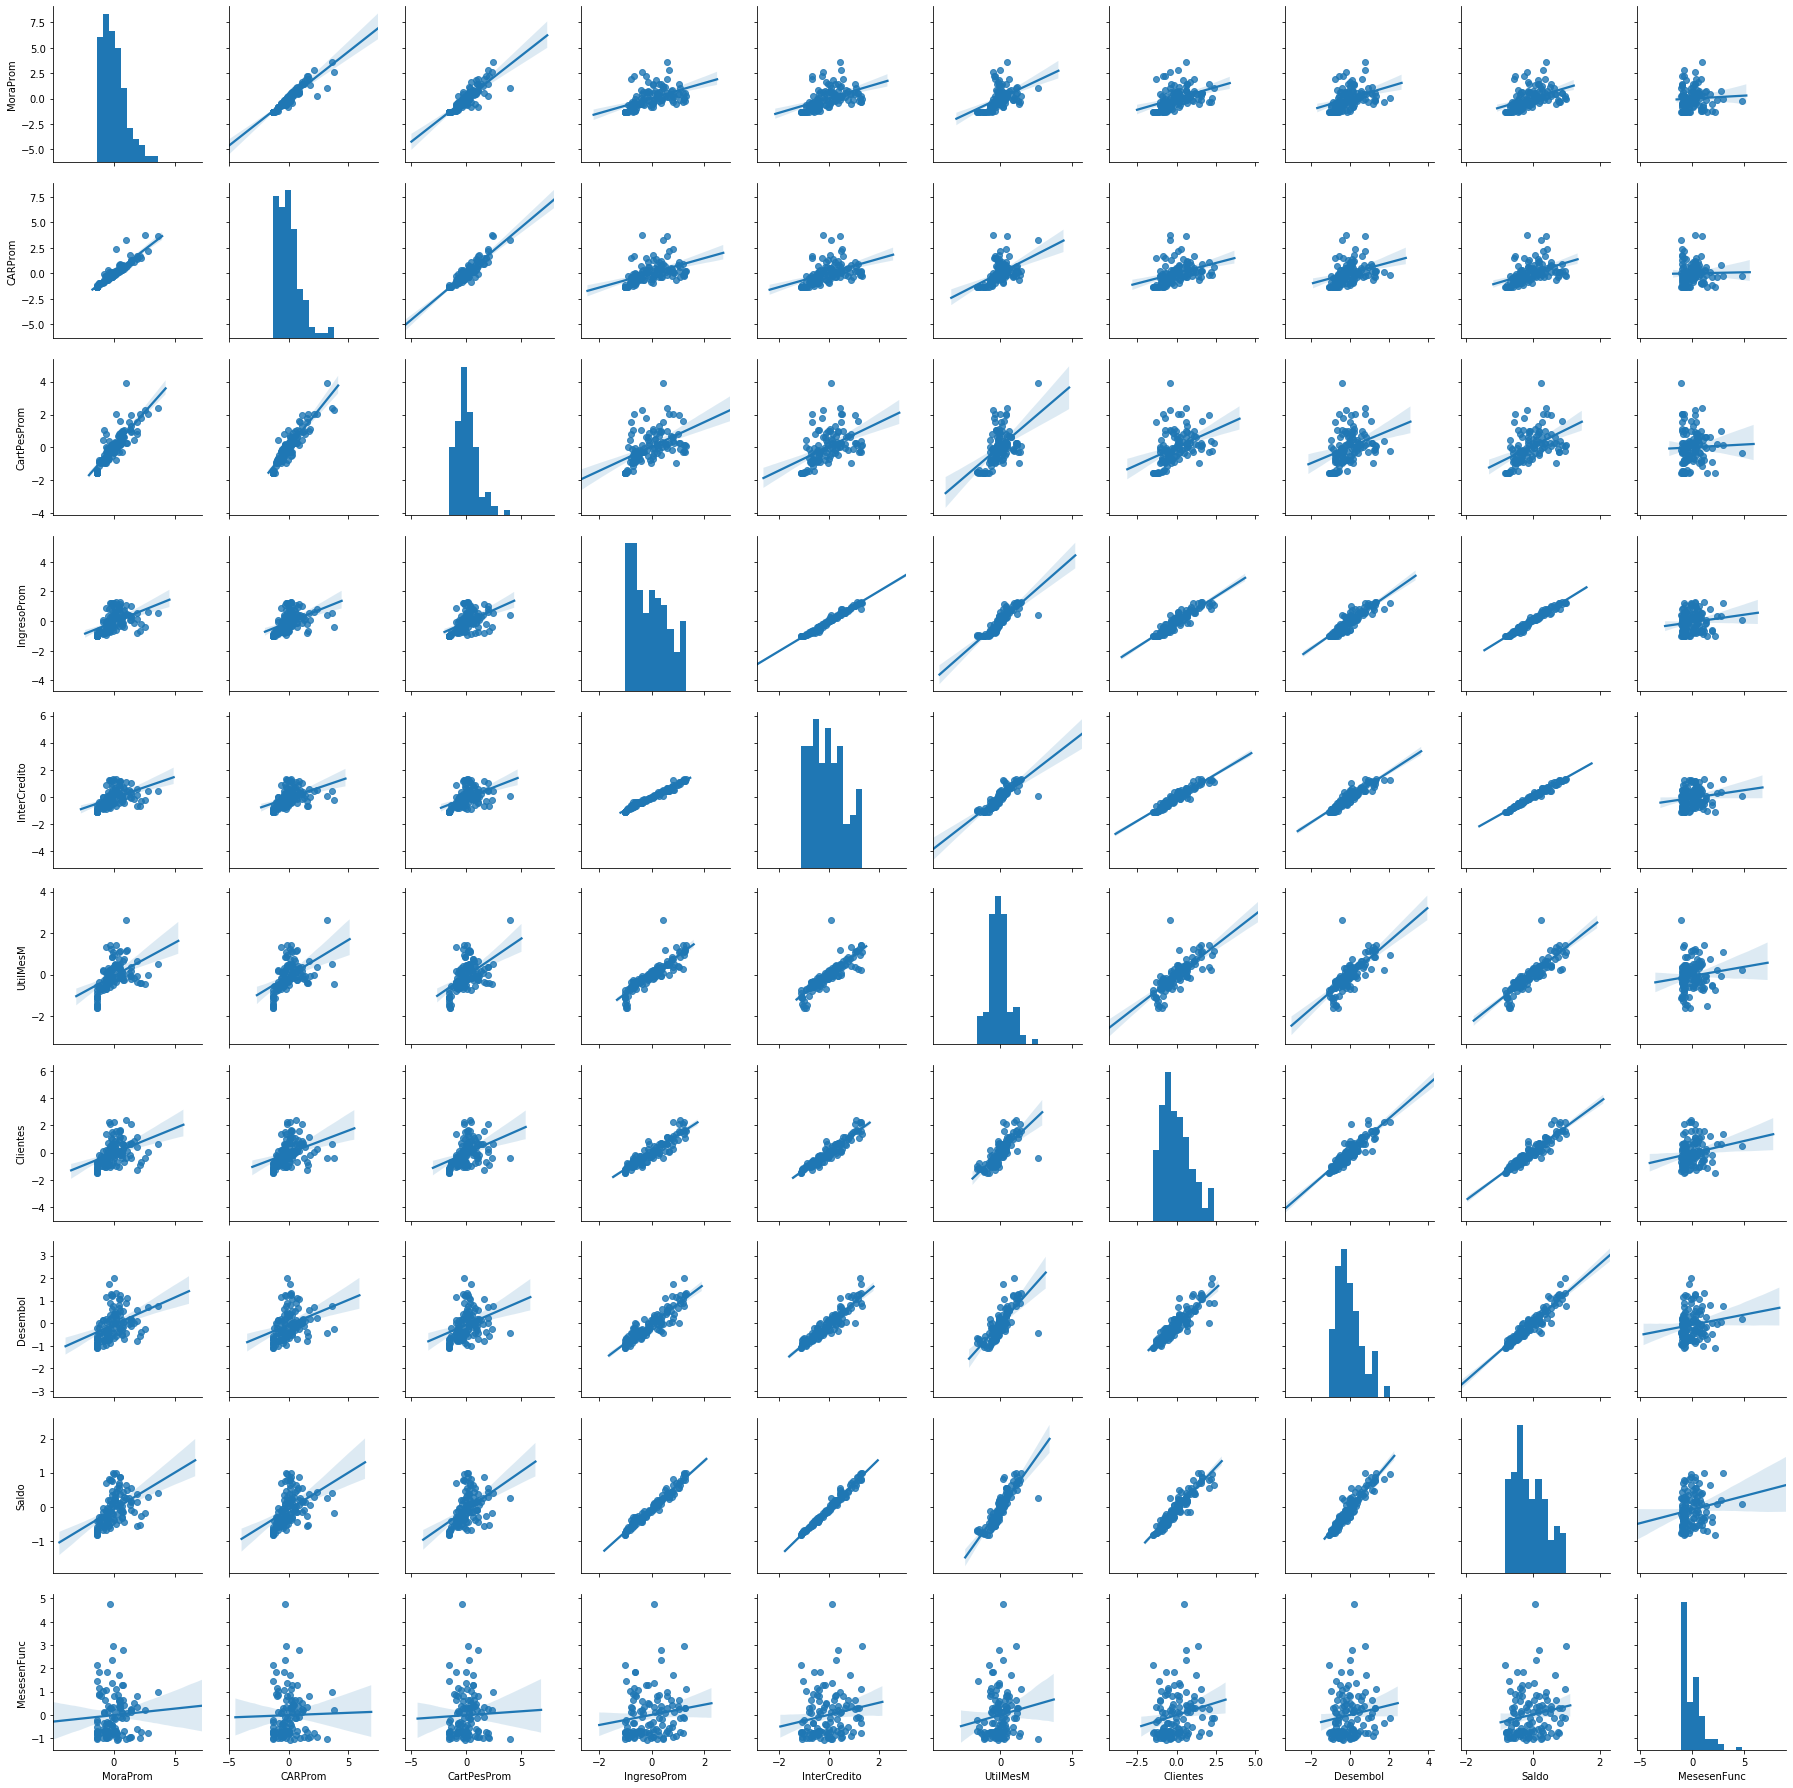

In [11]:
# Matriz de dispersion, seleccionando variables

sb.pairplot(X_sc2, vars = ['MoraProm', 'CARProm', 'CartPesProm', 'IngresoProm', 'InterCredito', 'UtilMesM', 'Clientes', 
                           'Desembol', 'Saldo', 'MesesenFunc'], kind = 'reg')

In [12]:
mc1 = X_sc2.loc[:,['MoraProm', 'CARProm', 'CartPesProm', 'IngresoProm', 'InterCredito', 'UtilMesM', 'Clientes', 
                           'Desembol', 'Saldo', 'MesesenFunc']].corr()
mc1

,MoraProm,CARProm,CartPesProm,IngresoProm,InterCredito,UtilMesM,Clientes,Desembol,Saldo,MesesenFunc
MoraProm,1.000000,0.923823,0.848180,0.498472,0.473597,0.461400,0.404408,0.373253,0.460788,0.057059
CARProm,0.923823,1.000000,0.907383,0.483192,0.453668,0.498050,0.364311,0.337988,0.457680,0.020287
CartPesProm,0.848180,0.907383,1.000000,0.497344,0.478138,0.518754,0.391707,0.323773,0.474198,0.033753
IngresoProm,0.498472,0.483192,0.497344,1.000000,0.986709,0.881339,0.922249,0.894694,0.980776,0.148379
InterCredito,0.473597,0.453668,0.478138,0.986709,1.000000,0.862640,0.949417,0.920343,0.988773,0.171348
UtilMesM,0.461400,0.498050,0.518754,0.881339,0.862640,1.000000,0.766119,0.761053,0.868039,0.124530
Clientes,0.404408,0.364311,0.391707,0.922249,0.949417,0.766119,1.000000,0.893521,0.937985,0.194264
Desembol,0.373253,0.337988,0.323773,0.894694,0.920343,0.761053,0.893521,1.000000,0.936599,0.136490
Saldo,0.460788,0.457680,0.474198,0.980776,0.988773,0.868039,0.937985,0.936599,1.000000,0.166740
MesesenFunc,0.057059,0.020287,0.033753,0.148379,0.171348,0.124530,0.194264,0.136490,0.166740,1.000000


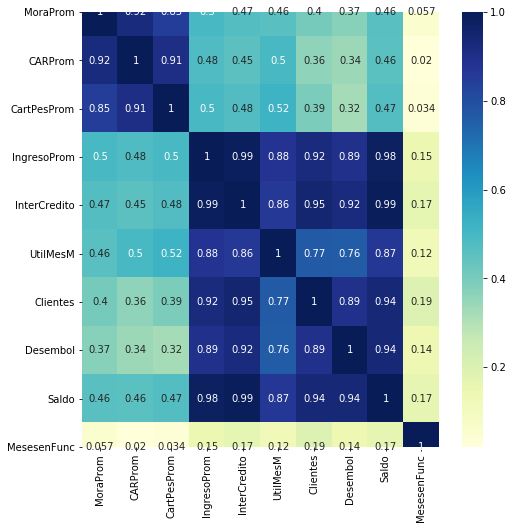

In [13]:
plt.rcParams['figure.figsize'] = (8,8)

sb.heatmap(mc1, cmap="YlGnBu", cbar=True, annot=True)

## Dividir la data en train y test, para evaluar el performance del modelo

In [14]:
X_sc2.columns

Index(['MoraProm', 'CARProm', 'CartPesProm', 'IngresoProm', 'InterCredito',
       'UtilMesM', 'Clientes', 'Desembol', 'Saldo', 'MesesenFunc', 'PCA1',
       'PCA2', 'Clusters'],
      dtype='object')

In [15]:
X1 = X_sc2.drop(['IngresoProm', 'PCA1', 'PCA2', 'Clusters'], axis=1)

In [16]:
X1.head()

,MoraProm,CARProm,CartPesProm,InterCredito,UtilMesM,Clientes,Desembol,Saldo,MesesenFunc
0,1.446519,1.277585,1.004783,-0.050573,-0.229777,-0.373024,-0.110845,-0.097945,-0.941816
1,2.201745,1.508466,1.786146,-0.275232,-0.410476,-0.728817,-0.375103,-0.264979,-0.742278
2,1.871532,1.403721,0.831406,0.172145,-0.050200,0.411396,0.105822,0.152350,-0.619909
3,1.456239,1.101076,1.987082,1.047966,0.386785,2.074341,0.019250,0.541517,0.270296
4,1.395312,1.142421,1.312514,0.221124,0.149740,0.665994,0.159600,0.146517,0.112650


In [17]:
Y = X_sc2[['IngresoProm']]
Y.head()

,IngresoProm
0,0.054485
1,-0.216628
2,0.153551
3,1.045825
4,0.273508


In [18]:
import statsmodels.api as sm

X2 = sm.add_constant(X1)

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
X2.head()

,const,MoraProm,CARProm,CartPesProm,InterCredito,UtilMesM,Clientes,Desembol,Saldo,MesesenFunc
0,1.0,1.446519,1.277585,1.004783,-0.050573,-0.229777,-0.373024,-0.110845,-0.097945,-0.941816
1,1.0,2.201745,1.508466,1.786146,-0.275232,-0.410476,-0.728817,-0.375103,-0.264979,-0.742278
2,1.0,1.871532,1.403721,0.831406,0.172145,-0.050200,0.411396,0.105822,0.152350,-0.619909
3,1.0,1.456239,1.101076,1.987082,1.047966,0.386785,2.074341,0.019250,0.541517,0.270296
4,1.0,1.395312,1.142421,1.312514,0.221124,0.149740,0.665994,0.159600,0.146517,0.112650


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=2020)
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=2020)

In [22]:
print("X1_train.shape: ", X1_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X1_test.shape: ", X1_test.shape)
print("Y_test.shape: ", Y_test.shape)

X1_train.shape:  (95, 9)
Y_train.shape:  (95, 1)
X1_test.shape:  (24, 9)
Y_test.shape:  (24, 1)


In [24]:
print("X2_train.shape: ", X2_train.shape)
print("X2_test.shape: ", X2_test.shape)

X2_train.shape:  (95, 10)
X2_test.shape:  (24, 10)


# Regresion lineal

In [25]:
import statsmodels.api as sm

In [26]:
modelo1_Rlineal = sm.OLS(Y_train, X2_train).fit()
modelo1_Rlineal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IngresoProm   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     584.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.75e-72
Time:                        19:50:01   Log-Likelihood:                 104.42
No. Observations:                  95   AIC:                            -188.8
Df Residuals:                      85   BIC:                            -163.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0349      0.011      3.130      0.002       0.013       0.057
MoraProm         0.1015      0.030      3.425      0.001       0.043       0.160
CARProm         -0.0444      0.035     -1.261      0.211      -0.114       0.026
CartPesProm     -0.0613      0.024     -2.551      0.013      -0.109      -0.014
InterCredito     0.6743      0.106      6.376      0.000       0.464       0.885
UtilMesM         0.0687      0.028      2.441      0.017       0.013       0.125
Clientes        -0.0813      0.033     -2.496      0.015      -0.146      -0.017
Desembol        -0.2321      0.051     -4.572      0.000      -0.333      -0.131
Saldo            0.8303      0.165      5.046      0.000       0.503       1.158
MesesenFunc     -0.0046      0.009     -0.512      0.610      -0.022       0.013
==============================================================================
Omnibus:                        8.045   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               13.609
Skew:                           0.251   Prob(JB):                      0.00111
Kurtosis:                       4.785   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Importancia de variables del Modelo de Regresion lineal

In [28]:
ImpVar = pd.DataFrame({'Importancia': modelo1_Rlineal.params})
ImpVar

,Importancia
const,0.034915
MoraProm,0.101535
CARProm,-0.044407
CartPesProm,-0.061279
InterCredito,0.674275
UtilMesM,0.068722
Clientes,-0.081304
Desembol,-0.232082
Saldo,0.830345
MesesenFunc,-0.004554


In [29]:
ImpVar = ImpVar.drop('const',axis=0) #eliminar constante
ImpVar

,Importancia
MoraProm,0.101535
CARProm,-0.044407
CartPesProm,-0.061279
InterCredito,0.674275
UtilMesM,0.068722
Clientes,-0.081304
Desembol,-0.232082
Saldo,0.830345
MesesenFunc,-0.004554


In [30]:
ImpVar = ImpVar.sort_values('Importancia', ascending=True)
ImpVar

,Importancia
Desembol,-0.232082
Clientes,-0.081304
CartPesProm,-0.061279
CARProm,-0.044407
MesesenFunc,-0.004554
UtilMesM,0.068722
MoraProm,0.101535
InterCredito,0.674275
Saldo,0.830345


Text(0.5, 0, 'Importancia')

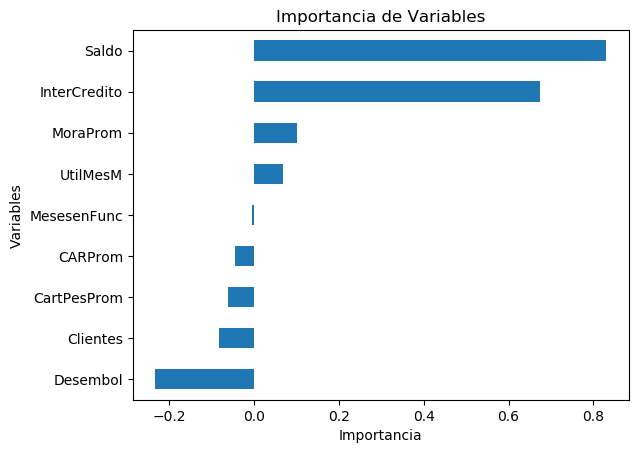

In [31]:
# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

plt.style.use('default')

ImpVar.plot.barh(legend=False)
plt.title('Importancia de Variables')
plt.ylabel('Variables')
plt.xlabel('Importancia')

## Algunos diagnosticos del modelo de Regresion lineal

Text(0, 0.5, 'Residuals Normalized')

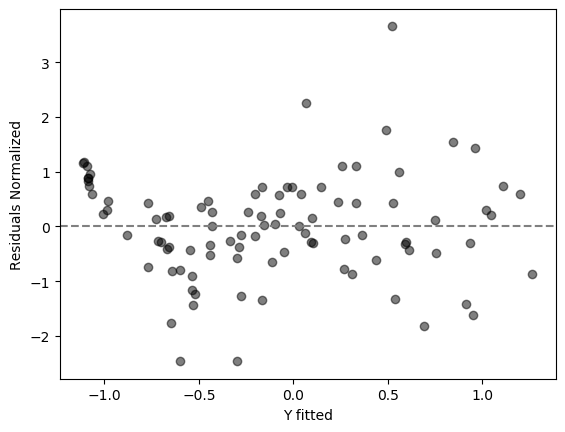

In [32]:
# Visualizar la relacion de los Residuos estandarizados del modelo vs. Valores estimados de Y

plt.scatter(x=modelo1_Rlineal.fittedvalues, y=modelo1_Rlineal.resid_pearson, color='black' ,edgecolor='black', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Y fitted")
plt.ylabel("Residuals Normalized")

In [33]:
from statsmodels.compat import lzip
import numpy as np
import statsmodels.stats.api as sms

### Prueba de hipotesis de Normalidad de los residuos

https://es.wikipedia.org/wiki/Test_de_Jarque-Bera

Jarque-Bera test: <br>
H0: datos si tienen distrib. Normal (asimetría y el exceso de curtosis son nulos (asimetría = 0 y curtosis = 3)) <br>
H1: datos no tienen distrib. Normal (asimetría y el exceso de curtosis son nulos (asimetría = 0 y curtosis = 3)) <br>

Chi-cuadrado

In [34]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(modelo1_Rlineal.resid)
lzip(name, test)

[('Jarque-Bera', 13.609395250162876),
 ('Chi^2 two-tail prob.', 0.0011085553197719643),
 ('Skew', 0.2512896299022089),
 ('Kurtosis', 4.784818505669948)]

### Prueba de hipotesis de Heterocedasticidad

https://es.wikipedia.org/wiki/Test_de_Breusch-Pagan

Breush-Pagan test: <br>
H0: varianza de los residuos no dependen de las variab. indep. (homocedastic.) <br>
H1: varianza de los residuos si dependen de las variab. indep. (heterocedastic.) <br>

F

In [35]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo1_Rlineal.resid, modelo1_Rlineal.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 8.114247168085537),
 ('p-value', 0.5226751866822292),
 ('f-value', 0.8820152221702962),
 ('f p-value', 0.5446634015065552)]

### Multicolinealidad

**VIF: Factor de Inflación de variación**

In [36]:
vif_data = pd.DataFrame() 
vif_data["Variable"] = X1.columns

In [37]:
vif_data

,Variable
0,MoraProm
1,CARProm
2,CartPesProm
3,InterCredito
4,UtilMesM
5,Clientes
6,Desembol
7,Saldo
8,MesesenFunc


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(len(X1.columns))] 
  
vif_data.sort_values('VIF', ascending=False)

,Variable,VIF
3,InterCredito,58.900434
7,Saldo,56.684551
1,CARProm,12.218355
5,Clientes,11.557369
6,Desembol,10.462524
0,MoraProm,8.137941
2,CartPesProm,6.464008
4,UtilMesM,4.969913
8,MesesenFunc,1.059260


## Evaluacion del modelo de Regresion lineal

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
Y_train_pred = modelo1_Rlineal.predict(X2_train)
Y_test_pred = modelo1_Rlineal.predict(X2_test)

In [41]:
MAE_train = [mean_absolute_error(Y_train, Y_train_pred)]
RMSE_train = [np.sqrt(mean_squared_error(Y_train, Y_train_pred))]
R2_train = [r2_score(Y_train, Y_train_pred)]

MAE_test = [mean_absolute_error(Y_test, Y_test_pred)]
RMSE_test = [np.sqrt(mean_squared_error(Y_test, Y_test_pred))]
R2_test = [r2_score(Y_test, Y_test_pred)]


col = {'MAE train': MAE_train, 'RMSE train': RMSE_train, 'R2 train': R2_train, 
      'MAE test': MAE_test, 'RMSE test': RMSE_test, 'R2 test': R2_test}
models = ['Regresion lineal']

EvModel1 = pd.DataFrame(data=col, index=models)
EvModel1

,MAE train,RMSE train,R2 train,MAE test,RMSE test,R2 test
Regresion lineal,0.061083,0.080617,0.984105,0.102365,0.131757,0.969531


# Regresion Ridge

In [42]:
from sklearn.linear_model import Ridge

### Busqueda automatica del mejor parametro lambda

In [44]:
alphas = np.linspace(0.001, 1, 50)
alphas

array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])

In [45]:
from sklearn.linear_model import RidgeCV

alphas = np.linspace(0.001, 1, 50)
modelo2_RRidge = RidgeCV(alphas = alphas).fit(X1_train, Y_train)

In [46]:
modelo2_RRidge.alpha_

0.26604081632653065

## Importancia de variables del modelo Regresion Ridge

In [50]:
ImpVar = pd.DataFrame({'Variables': X1.columns, 'Importancia': modelo2_RRidge.coef_.flatten()})
ImpVar

,Variables,Importancia
0,MoraProm,0.090117
1,CARProm,-0.041823
2,CartPesProm,-0.042571
3,InterCredito,0.671400
4,UtilMesM,0.104023
5,Clientes,-0.036806
6,Desembol,-0.134952
7,Saldo,0.561782
8,MesesenFunc,-0.006593


In [51]:
ImpVar = ImpVar.sort_values('Importancia', ascending=True)
ImpVar = ImpVar.set_index('Variables').rename_axis(None)
ImpVar

,Importancia
Desembol,-0.134952
CartPesProm,-0.042571
CARProm,-0.041823
Clientes,-0.036806
MesesenFunc,-0.006593
MoraProm,0.090117
UtilMesM,0.104023
Saldo,0.561782
InterCredito,0.671400


Text(0.5, 0, 'Importancia')

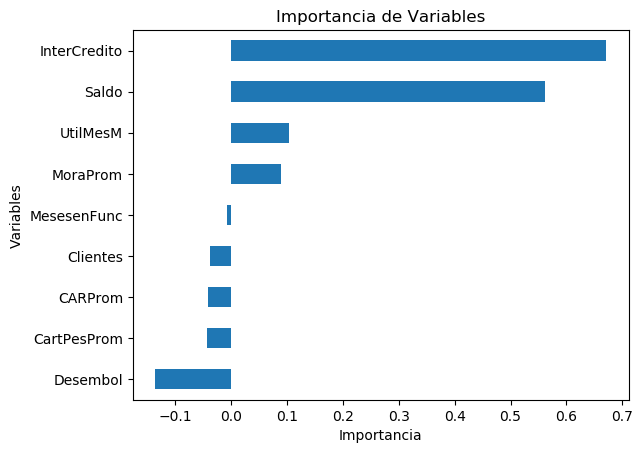

In [52]:
ImpVar.plot.barh(legend=False)
plt.title('Importancia de Variables')
plt.ylabel('Variables')
plt.xlabel('Importancia')

## Evaluacion del modelo de Regresion Ridge

In [53]:
Y_train_pred = modelo2_RRidge.predict(X1_train)
Y_test_pred = modelo2_RRidge.predict(X1_test)

In [54]:
MAE_train = [mean_absolute_error(Y_train, Y_train_pred)]
RMSE_train = [np.sqrt(mean_squared_error(Y_train, Y_train_pred))]
R2_train = [r2_score(Y_train, Y_train_pred)]

MAE_test = [mean_absolute_error(Y_test, Y_test_pred)]
RMSE_test = [np.sqrt(mean_squared_error(Y_test, Y_test_pred))]
R2_test = [r2_score(Y_test, Y_test_pred)]


col = {'MAE train': MAE_train, 'RMSE train': RMSE_train, 'R2 train': R2_train, 
      'MAE test': MAE_test, 'RMSE test': RMSE_test, 'R2 test': R2_test}
models = ['Regresion ridge']

EvModel2 = pd.DataFrame(data=col, index=models)

EvModelALL = pd.concat([EvModel1, EvModel2])
EvModelALL

,MAE train,RMSE train,R2 train,MAE test,RMSE test,R2 test
Regresion lineal,0.061083,0.080617,0.984105,0.102365,0.131757,0.969531
Regresion ridge,0.062832,0.083447,0.982969,0.088542,0.120289,0.974604


# Regresion Lasso

In [55]:
from sklearn.linear_model import Lasso

### Busqueda automatica del mejor parametro lambda

In [56]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001, 1, 50)
modelo3_RLasso = LassoCV(alphas = alphas).fit(X1_train, Y_train)

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [57]:
modelo3_RLasso.alpha_

0.001

## Importancia de variables del modelo Regresion Lasso

In [58]:
ImpVar = pd.DataFrame({'Variables':X1.columns, 'Importancia':modelo3_RLasso.coef_.flatten()})
ImpVar

,Variables,Importancia
0,MoraProm,0.066467
1,CARProm,-0.018213
2,CartPesProm,-0.042279
3,InterCredito,0.723620
4,UtilMesM,0.082791
5,Clientes,-0.042919
6,Desembol,-0.143503
7,Saldo,0.539999
8,MesesenFunc,-0.005706


In [59]:
ImpVar = ImpVar.sort_values('Importancia', ascending=True)
ImpVar = ImpVar.set_index('Variables').rename_axis(None)
ImpVar

,Importancia
Desembol,-0.143503
Clientes,-0.042919
CartPesProm,-0.042279
CARProm,-0.018213
MesesenFunc,-0.005706
MoraProm,0.066467
UtilMesM,0.082791
Saldo,0.539999
InterCredito,0.723620


Text(0.5, 0, 'Importancia')

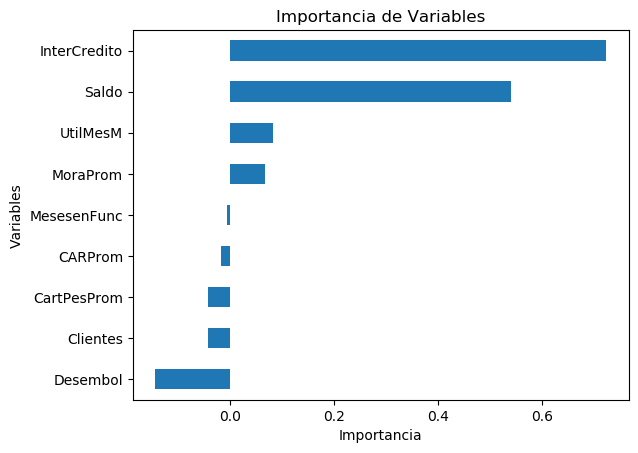

In [60]:
ImpVar.plot.barh(legend=False)
plt.title('Importancia de Variables')
plt.ylabel('Variables')
plt.xlabel('Importancia')

## Evaluacion del modelo de Regresion Lasso

In [61]:
Y_train_pred = modelo3_RLasso.predict(X1_train)
Y_test_pred = modelo3_RLasso.predict(X1_test)

In [62]:
MAE_train = [mean_absolute_error(Y_train, Y_train_pred)]
RMSE_train = [np.sqrt(mean_squared_error(Y_train, Y_train_pred))]
R2_train = [r2_score(Y_train, Y_train_pred)]

MAE_test = [mean_absolute_error(Y_test, Y_test_pred)]
RMSE_test = [np.sqrt(mean_squared_error(Y_test, Y_test_pred))]
R2_test = [r2_score(Y_test, Y_test_pred)]


col = {'MAE train': MAE_train, 'RMSE train': RMSE_train, 'R2 train': R2_train, 
      'MAE test': MAE_test, 'RMSE test': RMSE_test, 'R2 test': R2_test}
models = ['Regresion lasso']

EvModel3 = pd.DataFrame(data=col, index=models)

EvModelALL = pd.concat([EvModel1, EvModel2, EvModel3])
EvModelALL

,MAE train,RMSE train,R2 train,MAE test,RMSE test,R2 test
Regresion lineal,0.061083,0.080617,0.984105,0.102365,0.131757,0.969531
Regresion ridge,0.062832,0.083447,0.982969,0.088542,0.120289,0.974604
Regresion lasso,0.061689,0.083278,0.983038,0.086982,0.115646,0.976527


# Arbol de Regresion

In [63]:
from sklearn.tree import DecisionTreeRegressor

### Ajuste de hiperparametros del Arbol de Regresion

In [64]:
param_grid = {"max_depth": np.arange(3, 7, 1), "min_samples_split": np.arange(8, 17, 1),
              "min_samples_leaf": np.arange(4, 9, 1)}
param_grid

{'max_depth': array([3, 4, 5, 6]),
 'min_samples_split': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16]),
 'min_samples_leaf': array([4, 5, 6, 7, 8])}

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
modelo4_ArbRegr = DecisionTreeRegressor(random_state = 2020).fit(X1_train, Y_train)

grid = GridSearchCV(modelo4_ArbRegr, param_grid).fit(X1_train, Y_train)
grid

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=2020,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6]),
                         'min_samples_leaf': array([4, 5, 6, 7, 8]),
                         'min_samples_split': array([ 8,  9, 10, 11, 12, 13, 14

In [67]:
# print best parameter after tuning 
print(grid.best_params_) 

print('\n')

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 9}


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2020, splitter='best')


In [68]:
modelo4_ArbRegrTUNE = grid.best_estimator_
modelo4_ArbRegrTUNE

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2020, splitter='best')

## Visualizacion del Arbol de Regresion

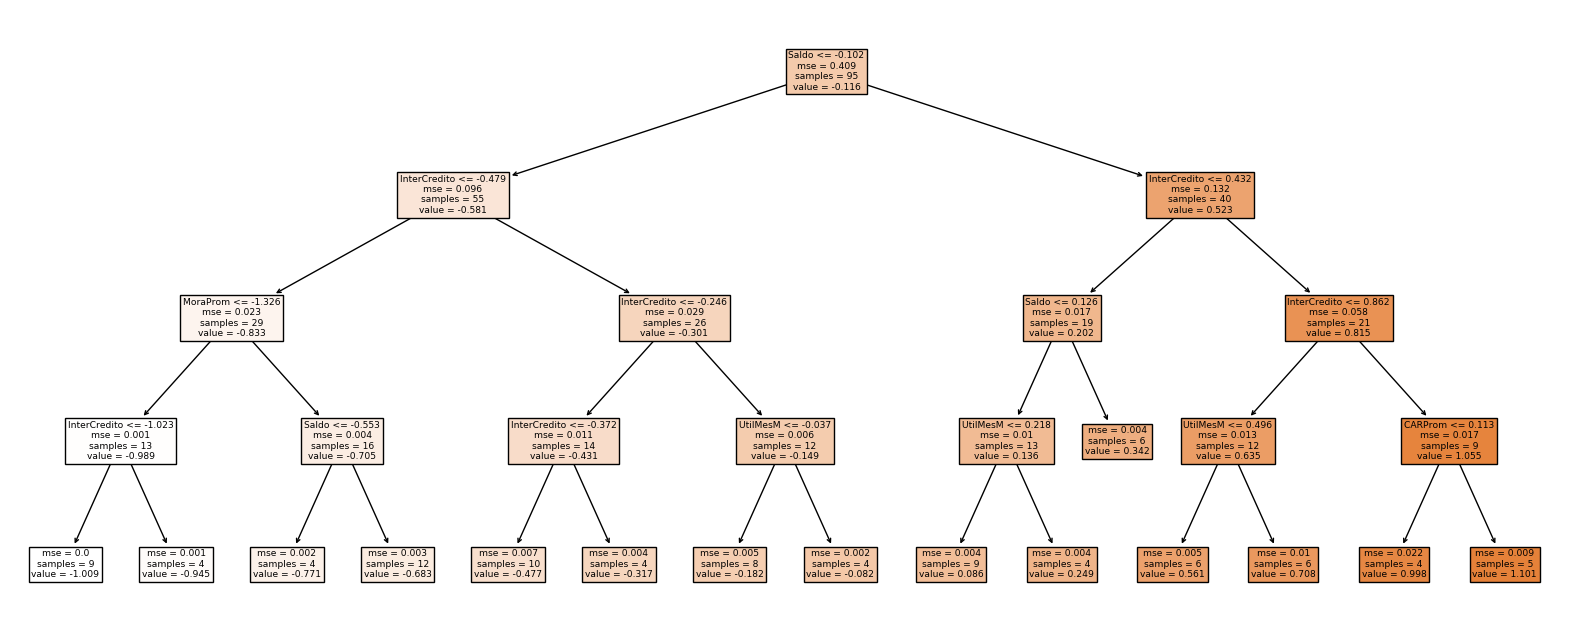

In [69]:
from sklearn import tree

plt.figure(figsize=(20,8))
tree.plot_tree(modelo4_ArbRegrTUNE, feature_names = X1_train.columns, filled=True);

## Importancia de variables del modelo Arbol de Regresion

In [70]:
ImpVar = pd.DataFrame({'Variables':X1.columns,'Importancia':modelo4_ArbRegrTUNE.feature_importances_})
ImpVar

,Variables,Importancia
0,MoraProm,0.015068
1,CARProm,0.000615
2,CartPesProm,0.000000
3,InterCredito,0.238169
4,UtilMesM,0.004316
5,Clientes,0.000000
6,Desembol,0.000000
7,Saldo,0.741833
8,MesesenFunc,0.000000


In [71]:
ImpVar = ImpVar.sort_values('Importancia', ascending=True)
ImpVar = ImpVar.set_index('Variables').rename_axis(None)
ImpVar

,Importancia
CartPesProm,0.000000
Clientes,0.000000
Desembol,0.000000
MesesenFunc,0.000000
CARProm,0.000615
UtilMesM,0.004316
MoraProm,0.015068
InterCredito,0.238169
Saldo,0.741833


Text(0.5, 0, 'Importancia')

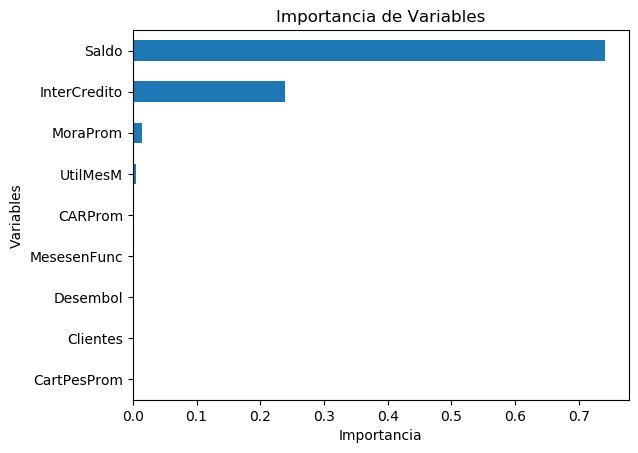

In [72]:
ImpVar.plot.barh(legend=False)
plt.title('Importancia de Variables')
plt.ylabel('Variables')
plt.xlabel('Importancia')

## Evaluacion del modelo Arbol de Regresion

In [73]:
Y_train_pred = modelo4_ArbRegrTUNE.predict(X1_train)
Y_test_pred = modelo4_ArbRegrTUNE.predict(X1_test)

In [74]:
MAE_train = [mean_absolute_error(Y_train, Y_train_pred)]
RMSE_train = [np.sqrt(mean_squared_error(Y_train, Y_train_pred))]
R2_train = [r2_score(Y_train, Y_train_pred)]

MAE_test = [mean_absolute_error(Y_test, Y_test_pred)]
RMSE_test = [np.sqrt(mean_squared_error(Y_test, Y_test_pred))]
R2_test = [r2_score(Y_test, Y_test_pred)]


col = {'MAE train': MAE_train, 'RMSE train': RMSE_train, 'R2 train': R2_train, 
      'MAE test': MAE_test, 'RMSE test': RMSE_test, 'R2 test': R2_test}
models = ['Arbol de Regresion']

EvModel4 = pd.DataFrame(data=col, index=models)

EvModelALL = pd.concat([EvModel1, EvModel2, EvModel3, EvModel4])
EvModelALL

,MAE train,RMSE train,R2 train,MAE test,RMSE test,R2 test
Regresion lineal,0.061083,0.080617,0.984105,0.102365,0.131757,0.969531
Regresion ridge,0.062832,0.083447,0.982969,0.088542,0.120289,0.974604
Regresion lasso,0.061689,0.083278,0.983038,0.086982,0.115646,0.976527
Arbol de Regresion,0.054479,0.071397,0.987532,0.110216,0.134719,0.968146


# Bosques aleatorios de Regresion

In [75]:
from sklearn.ensemble import RandomForestRegressor

### Ajuste de hiperparametros del Bosque Aleatorio de Regresion

In [76]:
param_grid = {"max_depth": np.arange(4, 7, 1),  "min_samples_split": np.arange(8, 11, 1),
              "min_samples_leaf": np.arange(4, 7, 1), "max_features": np.arange(5, 8, 1)}
param_grid

{'max_depth': array([4, 5, 6]),
 'min_samples_split': array([ 8,  9, 10]),
 'min_samples_leaf': array([4, 5, 6]),
 'max_features': array([5, 6, 7])}

In [77]:
modelo5_BosqAlRegr = RandomForestRegressor(n_estimators=100, random_state=2020, n_jobs=-1).fit(X1_train, Y_train)

grid = GridSearchCV(modelo5_BosqAlRegr, param_grid).fit(X1_train, Y_train)
grid

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_sel

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\caleb.terrel\AppData\Local\C

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=2020,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([4, 5, 6]),


In [78]:
# print best parameter after tuning 
print(grid.best_params_) 

print('\n')

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 8}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=2020, verbose=0,
                      warm_start=False)


In [79]:
modelo5_BosqAlRegrTUNE = grid.best_estimator_
modelo5_BosqAlRegrTUNE

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=2020, verbose=0,
                      warm_start=False)

### Importancia de variables del modelo Bosque Aleatorio de Regresion

In [80]:
ImpVar = pd.DataFrame({'Variables':X1.columns,'Importancia':modelo5_BosqAlRegrTUNE.feature_importances_})
ImpVar

,Variables,Importancia
0,MoraProm,0.005918
1,CARProm,0.001325
2,CartPesProm,0.001161
3,InterCredito,0.427580
4,UtilMesM,0.076117
5,Clientes,0.005879
6,Desembol,0.005166
7,Saldo,0.476252
8,MesesenFunc,0.000601


In [81]:
ImpVar = ImpVar.sort_values('Importancia', ascending=True)
ImpVar = ImpVar.set_index('Variables').rename_axis(None)
ImpVar

,Importancia
MesesenFunc,0.000601
CartPesProm,0.001161
CARProm,0.001325
Desembol,0.005166
Clientes,0.005879
MoraProm,0.005918
UtilMesM,0.076117
InterCredito,0.427580
Saldo,0.476252


Text(0.5, 0, 'Importancia')

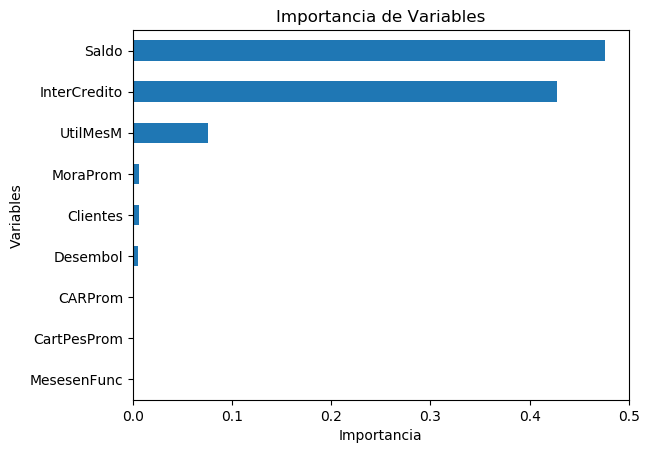

In [82]:
ImpVar.plot.barh(legend=False)
plt.title('Importancia de Variables')
plt.ylabel('Variables')
plt.xlabel('Importancia')

## Evaluacion del modelo Bosque Aleatorio de Regresion y los demas!!!

In [83]:
Y_train_pred = modelo5_BosqAlRegrTUNE.predict(X1_train)
Y_test_pred = modelo5_BosqAlRegrTUNE.predict(X1_test)

In [84]:
MAE_train = [mean_absolute_error(Y_train, Y_train_pred)]
RMSE_train = [np.sqrt(mean_squared_error(Y_train, Y_train_pred))]
R2_train = [r2_score(Y_train, Y_train_pred)]

MAE_test = [mean_absolute_error(Y_test, Y_test_pred)]
RMSE_test = [np.sqrt(mean_squared_error(Y_test, Y_test_pred))]
R2_test = [r2_score(Y_test, Y_test_pred)]


col = {'MAE train': MAE_train, 'RMSE train': RMSE_train, 'R2 train': R2_train, 
      'MAE test': MAE_test, 'RMSE test': RMSE_test, 'R2 test': R2_test}
models = ['Bosque Aletarorio de Regresion']

EvModel5 = pd.DataFrame(data=col, index=models)

EvModelALL = pd.concat([EvModel1, EvModel2, EvModel3, EvModel4, EvModel5])
EvModelALL

,MAE train,RMSE train,R2 train,MAE test,RMSE test,R2 test
Regresion lineal,0.061083,0.080617,0.984105,0.102365,0.131757,0.969531
Regresion ridge,0.062832,0.083447,0.982969,0.088542,0.120289,0.974604
Regresion lasso,0.061689,0.083278,0.983038,0.086982,0.115646,0.976527
Arbol de Regresion,0.054479,0.071397,0.987532,0.110216,0.134719,0.968146
Bosque Aletarorio de Regresion,0.052335,0.070786,0.987745,0.095509,0.127750,0.971356


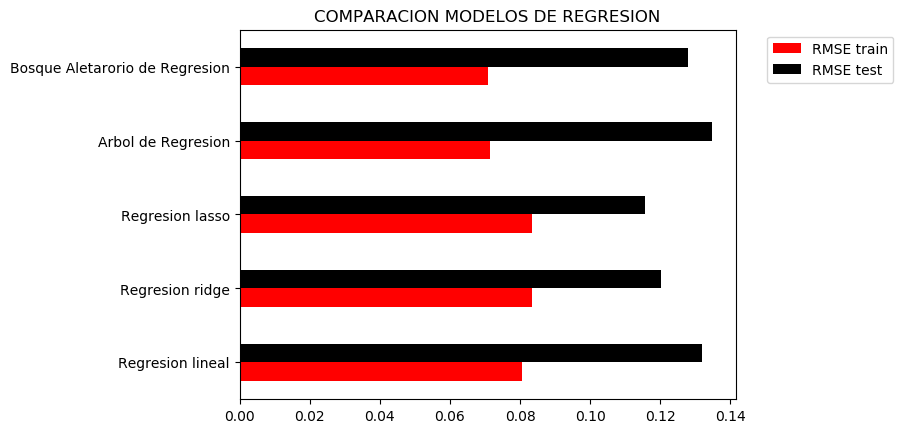

In [85]:
plt.style.use('default')
EvModelALL[['RMSE train', 'RMSE test']].plot.barh(cmap='flag', legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('COMPARACION MODELOS DE REGRESION')
plt.show()

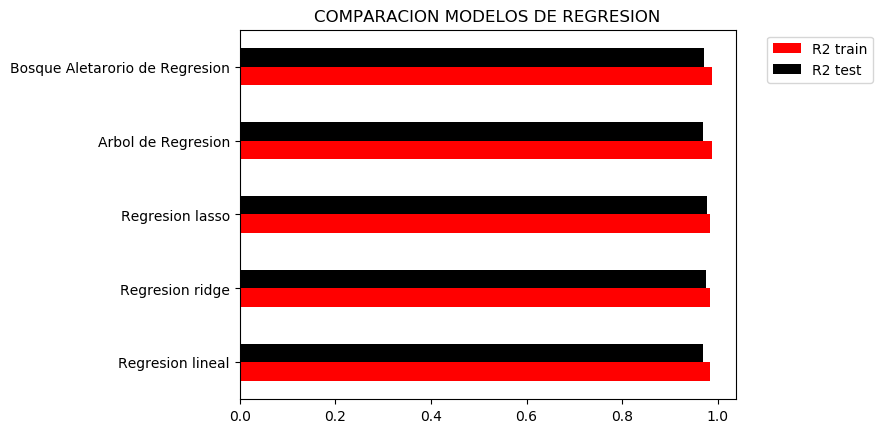

In [86]:
plt.style.use('default')
EvModelALL[['R2 train', 'R2 test']].plot.barh(cmap='flag', legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('COMPARACION MODELOS DE REGRESION')
plt.show()